Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:\\Users\\Lenovo\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
data_dir_test = pathlib.Path('C:\\Users\\Lenovo\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test')

In [8]:
train_set = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
test_set = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
image_height = 180
image_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo

train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123++odo


test_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_data.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

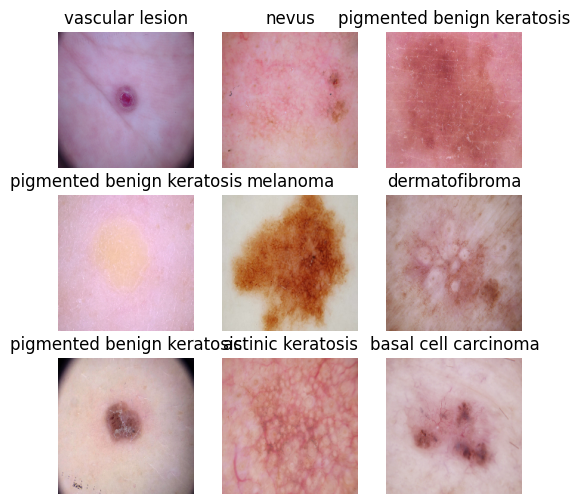

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize



import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
for images, labels in train_data.take(1):  #get the elements in the given positional indices along an axis
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [22]:
### Your code goes here
num_classes = 9
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [23]:
### Todo, choose an appropirate optimiser and loss function
# model.compile(optimizer='your_optimser',
#               loss=your_loss_function_goes_here,
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
# View the summary of all layers

#ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.
model.build(input_shape=(None,180,180,3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 41, 41, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 20, 20, 64)       

### Train the model

In [25]:
epochs = 20
history = model.fit(
  train_data,
  validation_data=test_data,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 118s 2s/step - loss: 1.9668 - accuracy: 0.2785 - val_loss: 2.5771 - val_accuracy: 0.0870
Epoch 2/20
56/56 [==============================] - 98s 2s/step - loss: 1.6672 - accuracy: 0.4040 - val_loss: 2.2977 - val_accuracy: 0.2609
Epoch 3/20
56/56 [==============================] - 97s 2s/step - loss: 1.5105 - accuracy: 0.4598 - val_loss: 2.7071 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 100s 2s/step - loss: 1.4302 - accuracy: 0.5033 - val_loss: 2.7277 - val_accuracy: 0.2174
Epoch 5/20
56/56 [==============================] - 99s 2s/step - loss: 1.3492 - accuracy: 0.5290 - val_loss: 3.0183 - val_accuracy: 0.3043
Epoch 6/20
56/56 [==============================] - 98s 2s/step - loss: 1.2873 - accuracy: 0.5452 - val_loss: 2.6000 - val_accuracy: 0.2609
Epoch 7/20
56/56 [==============================] - 97s 2s/step - loss: 1.2202 - accuracy: 0.5603 - val_loss: 3.3451 - val_accuracy: 0.2174
Epoch 8/20
56/56 [

### Visualizing training results

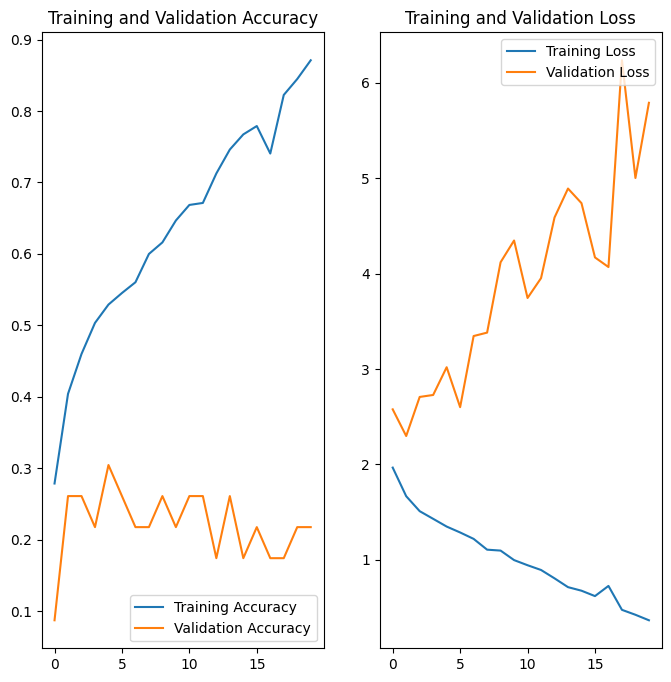

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

The learning curve shows signs of model overfitting as there is good training accuracy while the validation accuracy is below par.

### Write your findings here

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


TypeError: Invalid shape (1, 180, 180, 3) for image data

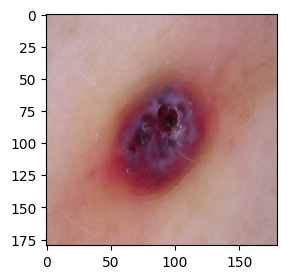

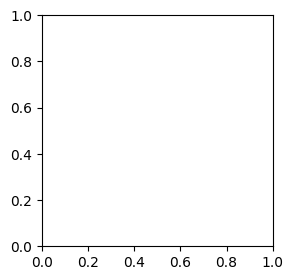

In [60]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here



data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(image_height, image_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.3),      
  ]
)

plt.figure(figsize=(3, 3))
plt.imshow(images[3].numpy().astype("uint8"))

print(type(images[3]))

image = tf.cast(tf.expand_dims(images[3], 0), tf.float32)
print(type(image))
plt.figure(figsize=(3, 3))
plt.imshow(image.numpy().astype("uint8"))

'\nfor images, labels in train_data.take(1):\n  for i in range(1):\n    ax = plt.subplot(3, 3, i + 1)\n    plt.imshow(images[i+15].numpy().astype("uint8"))\n    plt.title(class_names[labels[i+15]])\n    plt.axis("off")\n'

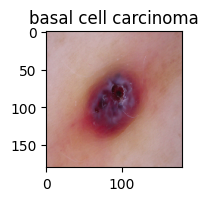

In [61]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(6, 6))
ax = plt.subplot(3, 3, 2)
plt.imshow(images[3].numpy().astype("uint8"))
plt.title(class_names[labels[2]])
'''
for images, labels in train_data.take(1):
  for i in range(1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i+15].numpy().astype("uint8"))
    plt.title(class_names[labels[i+15]])
    plt.axis("off")
'''

### Todo:
### Create the model, compile and train the model


In [63]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = tf.keras.Sequential([data_augmentation,
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Conv2D(64, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Conv2D(128, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.Dense(num_classes,activation='softmax')
])

### Compiling the model

In [64]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [66]:
## Your code goes here, note: train your model for 20 epochs
# history = ## your training code

epochs = 20
history = model.fit(train_data,batch_size=batch_size,validation_data=test_data,epochs=epochs)

Epoch 1/20


D:\Anaconda\envs\Yolov5\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


56/56 [==============================] - 21s 374ms/step - loss: 2.1886 - accuracy: 0.2070 - val_loss: 2.2584 - val_accuracy: 0.0870
Epoch 2/20
56/56 [==============================] - 24s 433ms/step - loss: 1.8922 - accuracy: 0.2818 - val_loss: 2.3688 - val_accuracy: 0.0870
Epoch 3/20
56/56 [==============================] - 26s 468ms/step - loss: 1.6775 - accuracy: 0.3884 - val_loss: 2.0591 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 25s 451ms/step - loss: 1.6529 - accuracy: 0.4023 - val_loss: 2.0448 - val_accuracy: 0.2174
Epoch 5/20
56/56 [==============================] - 22s 401ms/step - loss: 1.5590 - accuracy: 0.4403 - val_loss: 2.2276 - val_accuracy: 0.2174
Epoch 6/20
56/56 [==============================] - 22s 397ms/step - loss: 1.5361 - accuracy: 0.4492 - val_loss: 2.1166 - val_accuracy: 0.2609
Epoch 7/20
56/56 [==============================] - 26s 468ms/step - loss: 1.5566 - accuracy: 0.4554 - val_loss: 2.0204 - val_accuracy: 0.2609
Epoch 8/20

### Visualizing the results

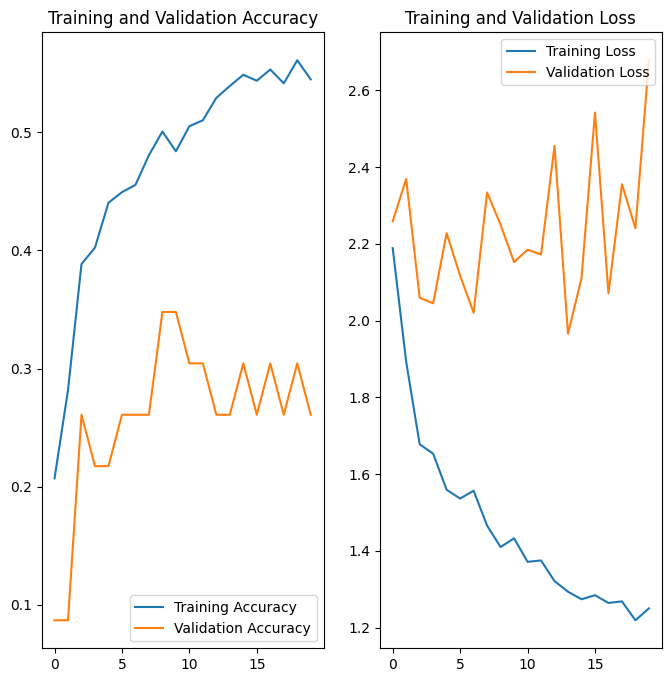

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There still exist overfitting due to the mismatch that is visible from the learning curve.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [68]:
## Your code goes here.


from glob import glob
path_image = [x for x in glob(os.path.join(data_dir_train,'*','*.jpg'))]
label_image = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*','*.jpg'))]
dataframe_dict = dict(zip(path_image, label_image))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns=['Path','Label'])
dataframe_dict

original_df['Label'].value_counts()


pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
There is a class imbalance as the number of entries in seborrheic keratosis is a quarter of the number of entries in pigmented benign keratosis and melanoma.


#### - Which class has the least number of samples?
seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [69]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [74]:
path_to_training_dataset="C:\\Users\\Lenovo\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
#path_to_training_dataset = "/content/gdrive/My Drive/Colab Notebooks/CNNAssignmentUpgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\Lenovo\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2011D842D90>: 100%|██████████| 500/500 [00:07<00:00, 70.58 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Users\Lenovo\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2011E22A610>: 100%|██████████| 500/500 [00:07<00:00, 71.08 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:\Users\Lenovo\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2011DBF9040>: 100%|██████████| 500/500 [00:07<00:00, 70.57 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\Lenovo\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x2011F99A250>: 100%|██████████| 500/500 [00:40<00:00, 12.21 Samples/s]                  


Initialised with 357 image(s) found.
Output directory set to C:\Users\Lenovo\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x2011E03F070>: 100%|██████████| 500/500 [00:39<00:00, 12.53 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:\Users\Lenovo\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2011D6DC7F0>: 100%|██████████| 500/500 [00:08<00:00, 60.36 Samples/s]


Initialised with 77 image(s) found.
Output directory set to C:\Users\Lenovo\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2011F8DADC0>: 100%|██████████| 500/500 [00:19<00:00, 25.62 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Users\Lenovo\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2011E04FFD0>: 100%|██████████| 500/500 [00:08<00:00, 56.88 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Users\Lenovo\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2011DC6FC70>: 100%|██████████| 500/500 [00:08<00:00, 60.31 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [75]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [76]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list

In [77]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [78]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [79]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17680\390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [80]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [92]:
batch_size = 32
image_height = 180
image_width = 180

#### **Todo:** Create a training dataset

In [93]:
# data_dir_train="path to directory with training data + data created using augmentor"
data_dir_train = "C:\\Users\\Lenovo\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [94]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [95]:
## your code goes here
model = tf.keras.Sequential([data_augmentation,
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Conv2D(64, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Conv2D(128, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [96]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
# epochs = 30
# ## Your code goes here, use 50 epochs.
# history = # your model fit code

epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/50
169/169 [==============================] - 132s 777ms/step - loss: 1.4485 - accuracy: 0.4375 - val_loss: 1.9083 - val_accuracy: 0.2609
Epoch 2/50
169/169 [==============================] - 164s 965ms/step - loss: 1.3746 - accuracy: 0.4649 - val_loss: 1.7014 - val_accuracy: 0.2609
Epoch 3/50
169/169 [==============================] - 155s 907ms/step - loss: 1.3332 - accuracy: 0.4841 - val_loss: 1.8705 - val_accuracy: 0.2609
Epoch 4/50
 57/169 [=========>....................] - ETA: 1:18 - loss: 1.2691 - accuracy: 0.5022

#### **Todo:**  Visualize the model results

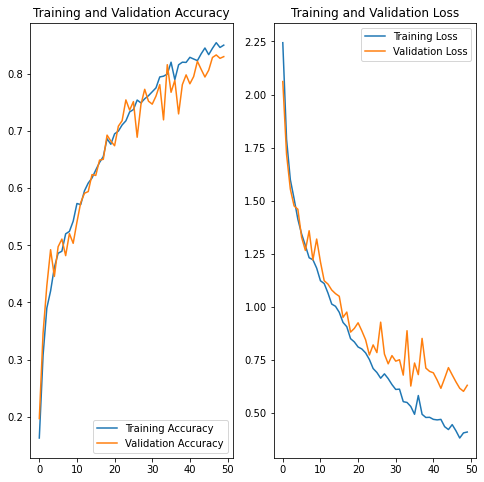

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

